In [38]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
import numpy as np 
import pickle
tf.config.optimizer.set_jit(True)
print(tf.__version__)

2.1.0


In [39]:
images = pickle.load(open("images_cats_dogs.pickle", "rb"))
labels = pickle.load(open("labels_cats_dogs.pickle", "rb"))

In [40]:
CLASSES = ["Dog","Cat"]

Dog


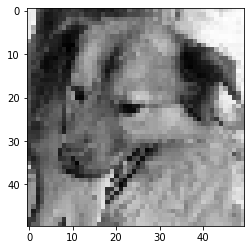

In [41]:
plt.imshow(images[10].reshape(50,50),cmap="gray")
print(CLASSES[labels[10]])

In [42]:
images = images / 255.0

In [43]:
images.shape

(24946, 50, 50, 1)

In [44]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=images.shape[1:]),    
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),    
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),    
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),    
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 2, 2, 128)        

In [45]:
model.fit(images,labels,batch_size=32,validation_split=0.1,epochs=10)

Train on 22451 samples, validate on 2495 samples
Epoch 1/10
22451/22451 [==============================] - 50s 2ms/sample - loss: 0.6828 - accuracy: 0.5502 - val_loss: 0.6635 - val_accuracy: 0.6112
Epoch 2/10
22451/22451 [==============================] - 45s 2ms/sample - loss: 0.6097 - accuracy: 0.6702 - val_loss: 0.5344 - val_accuracy: 0.7359
Epoch 3/10
22451/22451 [==============================] - 47s 2ms/sample - loss: 0.5141 - accuracy: 0.7476 - val_loss: 0.4966 - val_accuracy: 0.7631
Epoch 4/10
22451/22451 [==============================] - 48s 2ms/sample - loss: 0.4504 - accuracy: 0.7893 - val_loss: 0.5065 - val_accuracy: 0.7507
Epoch 5/10
22451/22451 [==============================] - 49s 2ms/sample - loss: 0.4054 - accuracy: 0.8180 - val_loss: 0.4304 - val_accuracy: 0.7964
Epoch 6/10
22451/22451 [==============================] - 52s 2ms/sample - loss: 0.3684 - accuracy: 0.8364 - val_loss: 0.4152 - val_accuracy: 0.8100
Epoch 7/10
22451/22451 [==============================] -